<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/DogsnCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [7]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.6 MB/s 


In [9]:
from mtcnn import MTCNN
import cv2
filename = '/content/photo-1-1557056832292340693979.webp'
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)

{'box': [738, 230, 82, 122], 'confidence': 0.9999994039535522, 'keypoints': {'left_eye': (771, 281), 'right_eye': (807, 286), 'nose': (798, 302), 'mouth_left': (775, 324), 'mouth_right': (805, 326)}}
{'box': [859, 269, 81, 107], 'confidence': 0.9999992847442627, 'keypoints': {'left_eye': (884, 310), 'right_eye': (919, 310), 'nose': (905, 330), 'mouth_left': (889, 351), 'mouth_right': (918, 351)}}
{'box': [315, 279, 77, 93], 'confidence': 0.9999971389770508, 'keypoints': {'left_eye': (326, 316), 'right_eye': (356, 309), 'nose': (338, 333), 'mouth_left': (337, 353), 'mouth_right': (362, 348)}}
{'box': [594, 254, 89, 107], 'confidence': 0.9999946355819702, 'keypoints': {'left_eye': (621, 289), 'right_eye': (662, 293), 'nose': (642, 317), 'mouth_left': (622, 334), 'mouth_right': (655, 337)}}
{'box': [468, 253, 77, 95], 'confidence': 0.9999097585678101, 'keypoints': {'left_eye': (485, 284), 'right_eye': (521, 285), 'nose': (501, 304), 'mouth_left': (489, 325), 'mouth_right': (517, 327)}}


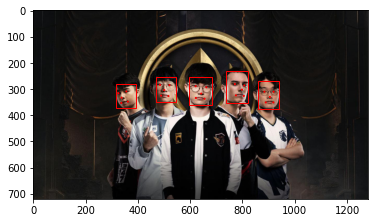

In [10]:
filename = '/content/photo-1-1557056832292340693979.webp'

data = plt.imread(filename)
plt.imshow(data)
ax=plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect = plt.Rectangle((x,y),width,height,fill=False,color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

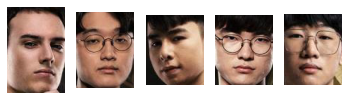

In [11]:
filename = '/content/photo-1-1557056832292340693979.webp' 

def draw_face(filename,result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1 , y1, width , height = result_list[i]['box']
    x2, y2 = x1 + width,y1+height
    plt.subplot(1,len(result_list) , i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2 , x1:x2])
  plt.show()


pixel = plt.imread(filename) # doc du lieu hinh anh
detector = MTCNN()  
faces = detector.detect_faces(pixel) 
draw_face(filename,faces)

In [23]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/data/train/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/data/validation/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1600 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


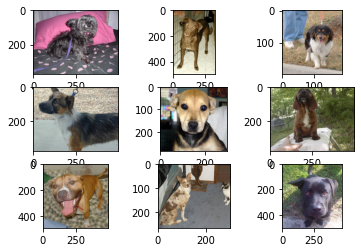

In [24]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/data/train/dogs/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'dog.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [25]:
train_dataset.classes
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(50,50,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 conv2d_52 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [27]:
opt = SGD(learning_rate = 0.001, momentum = 0.5)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(train_dataset,batch_size=32,epochs=10,verbose=1,validation_data=validation_dataset)